# Preprocessing

## Reading the standard-diff-log transformed time series (zdl-TS)

In [9]:
# from csv import writer
import pandas as pd
import numpy as np
def readTranspostTS(filePath):
    retT = pd.read_csv(filePath, encoding='ISO-8859-1', header=0).T
    retT.columns = list(retT.iloc[0])
    retT.drop('Unnamed: 0', inplace = True)
    retT = retT.astype(dtype = 'float64', copy=True)
    print('>>> Time Series reading complited!!')
    return(retT)
zdl_ts_train_validation = readTranspostTS(filePath="../data/storeSalesTS/zdl_ts_train_validation.csv")


>>> Time Series reading complited!!


In [10]:
zdl_ts_train_validation

,zdl_l_out_AUTOMOTIVE_1_sales,zdl_l_out_AUTOMOTIVE_2_sales,zdl_l_out_AUTOMOTIVE_3_sales,zdl_l_out_AUTOMOTIVE_4_sales,zdl_l_out_AUTOMOTIVE_5_sales,zdl_l_out_AUTOMOTIVE_6_sales,zdl_l_out_AUTOMOTIVE_7_sales,zdl_l_out_AUTOMOTIVE_8_sales,zdl_l_out_AUTOMOTIVE_9_sales,zdl_l_out_AUTOMOTIVE_10_sales,...,zdl_SEAFOOD_45_sales(t+16),zdl_SEAFOOD_46_sales(t+16),zdl_SEAFOOD_47_sales(t+16),zdl_SEAFOOD_48_sales(t+16),zdl_SEAFOOD_49_sales(t+16),zdl_SEAFOOD_50_sales(t+16),zdl_SEAFOOD_51_sales(t+16),zdl_SEAFOOD_52_sales(t+16),zdl_SEAFOOD_53_sales(t+16),zdl_SEAFOOD_54_sales(t+16)
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.618021,-0.928758,-0.668761,-0.606990,-1.139807,-0.322762,-0.581763,-0.006697,-0.001473,0.475147
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.350153,1.059203,0.732231,-0.067454,0.348965,1.382778,0.566531,-0.006697,-0.001473,-1.294602
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.207280,0.441991,0.363534,1.167491,0.636402,-0.230098,0.011980,-0.006697,-0.001473,0.813644
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.236284,-0.100127,0.816996,0.531502,0.244515,0.077578,0.159654,-0.006697,-0.001473,1.629224
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.336308,-0.447409,-1.074190,-1.650444,-0.846958,0.116438,-0.647336,-0.006697,-0.001473,-2.448680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044025,0.163262,-0.101472,-0.053136,-0.667450,0.398763,0.439819,0.275041,-0.708553,1.629224
2017-08-12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.044025,0.163262,-0.101472,-0.053136,-0.667450,0.398763,0.439819,0.275041,-0.708553,1.629224
2017-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044025,0.163262,-0.101472,-0.053136,-0.667450,0.398763,0.439819,0.275041,-0.708553,1.629224
2017-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044025,0.163262,-0.101472,-0.053136,-0.667450,0.398763,0.439819,0.275041,-0.708553,1.629224


### Taking the label of the zdl-target variables

In [11]:
zdl_targetsNms = [zdl_salesColumn for zdl_salesColumn in zdl_ts_train_validation.columns if ('_sales' in zdl_salesColumn) and ('(t' not in zdl_salesColumn) and ('_out_' not in zdl_salesColumn)]
nTargets = len(zdl_targetsNms) #2#you can increase nTargets if you wish
zdl_targetsNms = zdl_targetsNms[:nTargets]
print('nTargets = ', nTargets)
print('some targets: ', zdl_targetsNms[50:60])

nTargets =  1782
some targets:  ['zdl_AUTOMOTIVE_51_sales', 'zdl_AUTOMOTIVE_52_sales', 'zdl_AUTOMOTIVE_53_sales', 'zdl_AUTOMOTIVE_54_sales', 'zdl_BABY CARE_1_sales', 'zdl_BABY CARE_2_sales', 'zdl_BABY CARE_3_sales', 'zdl_BABY CARE_4_sales', 'zdl_BABY CARE_5_sales', 'zdl_BABY CARE_6_sales']


In [12]:
zdl_ts_train_validation[zdl_targetsNms  + [(zdl_targetNm + '(t-1)') for zdl_targetNm in zdl_targetsNms]].describe()

,zdl_AUTOMOTIVE_1_sales,zdl_AUTOMOTIVE_2_sales,zdl_AUTOMOTIVE_3_sales,zdl_AUTOMOTIVE_4_sales,zdl_AUTOMOTIVE_5_sales,zdl_AUTOMOTIVE_6_sales,zdl_AUTOMOTIVE_7_sales,zdl_AUTOMOTIVE_8_sales,zdl_AUTOMOTIVE_9_sales,zdl_AUTOMOTIVE_10_sales,...,zdl_SEAFOOD_45_sales(t-1),zdl_SEAFOOD_46_sales(t-1),zdl_SEAFOOD_47_sales(t-1),zdl_SEAFOOD_48_sales(t-1),zdl_SEAFOOD_49_sales(t-1),zdl_SEAFOOD_50_sales(t-1),zdl_SEAFOOD_51_sales(t-1),zdl_SEAFOOD_52_sales(t-1),zdl_SEAFOOD_53_sales(t-1),zdl_SEAFOOD_54_sales(t-1)
count,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,1.684000e+03,...,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03
mean,-2.505254e-18,-3.955664e-18,1.397668e-17,-1.687750e-17,1.951461e-17,3.428242e-18,-7.911328e-19,1.476781e-17,2.083316e-17,-2.755779e-17,...,0.004876,0.004484,0.005795,0.003733,0.005375,0.004116,0.004946,-0.000167,0.000420,-3.705139e-17
std,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,1.000297e+00,...,1.020322,1.017804,1.027606,1.011761,1.020816,1.016075,1.022813,1.000275,1.000148,1.000297e+00
min,-2.860921e+00,-3.317527e+00,-3.908892e+00,-3.131950e+00,-3.943089e+00,-3.272788e+00,-3.583701e+00,-4.706518e+00,-4.423654e+00,-3.146230e+00,...,-8.035134,-7.072224,-8.237217,-5.989647,-8.847112,-6.476197,-7.967992,-11.052929,-4.400505,-3.188322e+00
25%,-7.744381e-01,-6.441354e-01,-6.406981e-01,-6.667106e-01,-6.570478e-01,-6.355496e-01,-7.737759e-01,-6.166336e-01,-6.084689e-01,-7.058155e-01,...,-0.536964,-0.515033,-0.510935,-0.539094,-0.527076,-0.615822,-0.549584,-0.006697,-0.399680,-8.175180e-01
50%,-1.792543e-03,-2.458484e-03,-4.150452e-03,-3.269633e-03,-3.508034e-03,-2.550257e-03,-2.635289e-03,-2.607820e-03,-3.488804e-03,-2.065425e-03,...,-0.042940,0.085125,0.004989,0.079241,-0.055393,-0.007587,-0.104657,-0.006697,-0.001473,-1.937246e-03
75%,7.708531e-01,6.392184e-01,6.180993e-01,6.601713e-01,6.500317e-01,6.304490e-01,7.685053e-01,6.055242e-01,6.014913e-01,8.027087e-01,...,0.448728,0.559110,0.467065,0.587753,0.448509,0.563981,0.470397,-0.006697,0.396734,8.136435e-01
max,3.016849e+00,3.219519e+00,3.809699e+00,3.713951e+00,3.666099e+00,3.175856e+00,3.212963e+00,3.677243e+00,4.896378e+00,3.061995e+00,...,9.444669,8.528713,9.657629,6.627414,9.807270,7.626011,8.796166,14.679354,4.772297,3.103268e+00


In [13]:
zdl_ts_train_validation[zdl_targetsNms + [(zdl_targetNm + '(t+16)')
                       for zdl_targetNm in zdl_targetsNms  # targetsNms
                       ]].head(5)

,zdl_AUTOMOTIVE_1_sales,zdl_AUTOMOTIVE_2_sales,zdl_AUTOMOTIVE_3_sales,zdl_AUTOMOTIVE_4_sales,zdl_AUTOMOTIVE_5_sales,zdl_AUTOMOTIVE_6_sales,zdl_AUTOMOTIVE_7_sales,zdl_AUTOMOTIVE_8_sales,zdl_AUTOMOTIVE_9_sales,zdl_AUTOMOTIVE_10_sales,...,zdl_SEAFOOD_45_sales(t+16),zdl_SEAFOOD_46_sales(t+16),zdl_SEAFOOD_47_sales(t+16),zdl_SEAFOOD_48_sales(t+16),zdl_SEAFOOD_49_sales(t+16),zdl_SEAFOOD_50_sales(t+16),zdl_SEAFOOD_51_sales(t+16),zdl_SEAFOOD_52_sales(t+16),zdl_SEAFOOD_53_sales(t+16),zdl_SEAFOOD_54_sales(t+16)
2013-01-01,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,-0.618021,-0.928758,-0.668761,-0.606990,-1.139807,-0.322762,-0.581763,-0.006697,-0.001473,0.475147
2013-01-02,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,1.350153,1.059203,0.732231,-0.067454,0.348965,1.382778,0.566531,-0.006697,-0.001473,-1.294602
2013-01-03,0.318884,-0.511786,-0.452641,-1.400600,-0.471372,-0.359037,-0.904812,-1.652975,1.726142,-0.336077,...,0.207280,0.441991,0.363534,1.167491,0.636402,-0.230098,0.011980,-0.006697,-0.001473,0.813644
2013-01-04,-0.001793,-0.511786,-0.980336,0.818477,0.464356,0.630449,-0.002635,2.225751,-4.039440,-0.002065,...,0.236284,-0.100127,0.816996,0.531502,0.244515,0.077578,0.159654,-0.006697,-0.001473,1.629224
2013-01-05,0.450176,0.506869,1.655794,0.261274,-0.471372,-0.002550,-0.002635,-0.201484,4.285664,-1.277602,...,-1.336308,-0.447409,-1.074190,-1.650444,-0.846958,0.116438,-0.647336,-0.006697,-0.001473,-2.448680


## Determining the features and targets

In [14]:
# lag targets
# the future of the time series:
# lagTargetsNms = [
#     lagedVarNm for lagedVarNm in ts_train_validation.columns if 
#       ('(t+' in lagedVarNm)] 
    #   and (aggregatedVarNm not in lagedVarNm)]
zdl_lagTargetsNms = [lagedVarNm for lagedVarNm in zdl_ts_train_validation.columns if 
      ('zdl_' in lagedVarNm) and ('(t+' in lagedVarNm) ]
    #   and  (aggregatedVarNm not in lagedVarNm)]
# Lag variables
# featuresNms = [
#     lagedVarNm for lagedVarNm in ts_train_validation.columns if 
#           ('(t-' in lagedVarNm) #and 
#       #     (aggregatedVarNm in lagedVarNm)
#           ]
#zdl-based outilier indicator variables
# zdl_featuresNms =  zdl_l_outlier_targetNms + zdl_u_outlier_targetNms
# based on them, the future of the time serises will be forecasted:
# the present values of the series. Without the copy, both objects point to the same place (thus, becoming the same object)
# featuresNms += [aggregatedVarNm]  # + targetsNms.copy()
# the past values of the time series:
zdl_featuresNms = zdl_targetsNms + [
    lagedVarNm for lagedVarNm in zdl_ts_train_validation.columns if 
          ('zdl_' in lagedVarNm) and 
          ('(t-' in lagedVarNm) #and 
      #     (aggregatedVarNm in lagedVarNm)
          ]
# Calendar variables:
# featuresNms += ['daycount', 'dayofweek',
#                 'dayofmonth', 'dayofyear', 'month', 'year']
# On-promotion variables:

# featuresNms += ['onpromotion_m']  # [
#     _onpromotion for _onpromotion in ts_train_validation.columns if '_onpromotion' in _onpromotion]
print('>>> Thus, for ', len(zdl_targetsNms), ' sales time series, there are ', len(zdl_featuresNms),
      ' features (predictive variables).', ' Some of these features: \n ',
      zdl_featuresNms[:10])
print('>>> Thus, there are ', len(zdl_lagTargetsNms), ' targets (dependent variables).',
      ' Some of these targets: \n ', zdl_lagTargetsNms[:10])


>>> Thus, for  1782  sales time series, there are  28512  features (predictive variables).  Some of these features: 
  ['zdl_AUTOMOTIVE_1_sales', 'zdl_AUTOMOTIVE_2_sales', 'zdl_AUTOMOTIVE_3_sales', 'zdl_AUTOMOTIVE_4_sales', 'zdl_AUTOMOTIVE_5_sales', 'zdl_AUTOMOTIVE_6_sales', 'zdl_AUTOMOTIVE_7_sales', 'zdl_AUTOMOTIVE_8_sales', 'zdl_AUTOMOTIVE_9_sales', 'zdl_AUTOMOTIVE_10_sales']
>>> Thus, there are  28512  targets (dependent variables).  Some of these targets: 
  ['zdl_AUTOMOTIVE_1_sales(t+1)', 'zdl_AUTOMOTIVE_2_sales(t+1)', 'zdl_AUTOMOTIVE_3_sales(t+1)', 'zdl_AUTOMOTIVE_4_sales(t+1)', 'zdl_AUTOMOTIVE_5_sales(t+1)', 'zdl_AUTOMOTIVE_6_sales(t+1)', 'zdl_AUTOMOTIVE_7_sales(t+1)', 'zdl_AUTOMOTIVE_8_sales(t+1)', 'zdl_AUTOMOTIVE_9_sales(t+1)', 'zdl_AUTOMOTIVE_10_sales(t+1)']


## Spliting strategies

### Spliting with sklearn.model_selection
Here, one has random selected rows for training and validating. Caution must be taken in this case, once it breaks the chronological sequence of the time series.

In [15]:
# Train / Validation split
from sklearn.model_selection import train_test_split
def get_sklearn_train_test_split(pTrain=.8, ts_train_validation=zdl_ts_train_validation,
                                  featuresNms=zdl_featuresNms, targetsNms=zdl_lagTargetsNms, 
                                  isToPrintShapes=False):
    x_train_valid = ts_train_validation[featuresNms]
    y_train_valid = ts_train_validation[targetsNms]
    x_train, x_valid, y_train, y_valid = train_test_split(
        x_train_valid, y_train_valid, test_size=(1-pTrain), random_state=0)
    if isToPrintShapes:
        print('x_train.shape: ', x_train.shape)
        print('y_train.shape: ', y_train.shape)
        print('x_valid.shape: ', x_valid.shape)
        print('y_valid.shape: ', y_valid.shape)
    return x_train, x_valid, y_train, y_valid
# x_train, x_valid, y_train, y_valid = get_sklearn_train_test_split(isToPrintShapes=True)


### Usual way to split time series between train and validation sets
Here the first part of the data is used for training and the last for validating the predictors.

In [16]:
# Train / Validation split
def get_usual_ts_train_validation_split(pTrain=.8, ts_train_validation=zdl_ts_train_validation,
                                  featuresNms=zdl_featuresNms, targetsNms=zdl_lagTargetsNms, 
                                  isToPrintShapes=False):
    n_m = len(ts_train_validation)  # size of the full training set
    n = round(pTrain*n_m)  # size of the training set for modeling
    m = n_m - n  # size of the training set for validation
    # splitDate = ts_train_validation.index.values[n-1]  # end date for training
    # print('splitDate: ', splitDate)
    ts_train = ts_train_validation.iloc[:n]#ts_train_validation.index <= splitDate]
    ts_validation = ts_train_validation.iloc[n:]#ts_train_validation.index > splitDate]

    x_train = ts_train[featuresNms]
    y_train = ts_train[targetsNms]
    x_valid = ts_validation[featuresNms]
    y_valid = ts_validation[targetsNms]
    if isToPrintShapes:
        print('x_train.shape: ', x_train.shape)
        print('y_train.shape: ', y_train.shape)
        print('x_valid.shape: ', x_valid.shape)
        print('y_valid.shape: ', y_valid.shape)
    return x_train, x_valid, y_train, y_valid, n, m
zdl_x_train, zdl_x_valid, zdl_y_train, zdl_y_valid, n, m = get_usual_ts_train_validation_split(isToPrintShapes=True)
print('train set end: ', zdl_x_train.index[n-1])
print('validation set begin: ', zdl_x_valid.index.values[0])
print('>>> Here, we have the first ', n,
      ' instances for effectively training the models and the last ', m, ' for validating them.')


x_train.shape:  (1347, 28512)
y_train.shape:  (1347, 28512)
x_valid.shape:  (337, 28512)
y_valid.shape:  (337, 28512)
train set end:  2016-09-11
validation set begin:  2016-09-12
>>> Here, we have the first  1347  instances for effectively training the models and the last  337  for validating them.


In [17]:
pd.concat([zdl_y_train.head(1), zdl_y_train.tail(1), zdl_y_valid.head(1), zdl_y_valid.tail(1)], axis=0).head()

,zdl_AUTOMOTIVE_1_sales(t+1),zdl_AUTOMOTIVE_2_sales(t+1),zdl_AUTOMOTIVE_3_sales(t+1),zdl_AUTOMOTIVE_4_sales(t+1),zdl_AUTOMOTIVE_5_sales(t+1),zdl_AUTOMOTIVE_6_sales(t+1),zdl_AUTOMOTIVE_7_sales(t+1),zdl_AUTOMOTIVE_8_sales(t+1),zdl_AUTOMOTIVE_9_sales(t+1),zdl_AUTOMOTIVE_10_sales(t+1),...,zdl_SEAFOOD_45_sales(t+16),zdl_SEAFOOD_46_sales(t+16),zdl_SEAFOOD_47_sales(t+16),zdl_SEAFOOD_48_sales(t+16),zdl_SEAFOOD_49_sales(t+16),zdl_SEAFOOD_50_sales(t+16),zdl_SEAFOOD_51_sales(t+16),zdl_SEAFOOD_52_sales(t+16),zdl_SEAFOOD_53_sales(t+16),zdl_SEAFOOD_54_sales(t+16)
2013-01-01,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,-0.618021,-0.928758,-0.668761,-0.606990,-1.139807,-0.322762,-0.581763,-0.006697,-0.001473,0.475147
2016-09-11,1.792235,-0.318149,-2.405011,-1.646762,-0.678606,1.358816,-0.376968,0.822576,-0.326976,0.468697,...,-0.117618,0.017950,-0.228994,-0.132735,0.013551,-0.030635,-0.409232,-0.006697,-0.960921,-0.001937
2016-09-12,-0.001793,0.165278,0.783978,-0.003270,-0.657048,0.188468,-1.022028,0.263042,0.319999,-0.472828,...,0.285934,0.216588,-0.723073,0.312903,0.220285,-1.257942,0.272454,-0.006697,0.773142,-0.001937
2017-08-15,1.019589,-0.644135,0.679608,1.159532,0.492448,-0.397168,0.448453,-0.403174,0.737109,1.061788,...,0.044025,0.163262,-0.101472,-0.053136,-0.667450,0.398763,0.439819,0.275041,-0.708553,1.629224


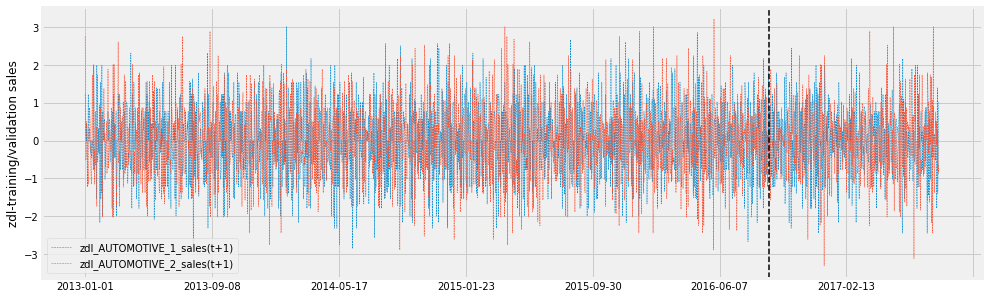

In [18]:
# https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt
import matplotlib.pyplot as plt
import seaborn as sns
import random


plt.style.use('fivethirtyeight')
color_palette = sns.color_palette()

fig, ax = plt.subplots(figsize=(15, 5))
zdl_ts_train_validation[zdl_y_train.columns[:2]].plot(ax=ax, color=color_palette[:2], style='--', linewidth=.5,
                                ylabel='zdl-training/validation sales')
ax.axvline(n, color='black', ls='--', linewidth=1.5)
ax.legend(zdl_y_train.columns[:2])
plt.show();


# Regression

## Pipelines for tranforming the predictor variables

In [19]:
# from sklearn.pipeline import Pipeline 
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler#, MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# qualiVars = []#In this particular TS approach, we do not have quali variables 
# quantiVars = featuresNms
 
# quantiPipeline = Pipeline([('imputer', SimpleImputer(strategy = "median", add_indicator = True)), 
#                            ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))
# # quantiOk = pd.DataFrame(quantiPipeline.fit_transform(quantiDf), columns=quantiPipeline.get_feature_names_out())
# # quantiOk.head()
# fullPipeline = ColumnTransformer([("quanti", quantiPipeline, quantiVars), 
#                                   ("quali", OneHotEncoder(), qualiVars)]) 
# fullPipeline


In [20]:
# x_train = fullPipeline.fit_transform(x_train)
# x_valid = fullPipeline.transform(x_valid)
# # x_train = pd.DataFrame(fullPipeline.fit_transform(train), columns=fullPipeline.get_feature_names_out())
# # x_train.head()
# print('>>> x_train:', x_train[:2])
# print('>>> x_valid:', x_valid[:2])
# print('>>> x_valid Data Frame:')
# pd.DataFrame(x_valid, columns=fullPipeline.get_feature_names_out()).head()

## Models Fitting, Saving, Reading, Prediction, and Performance Evaluation

In [21]:
import os
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
# import pickle
import joblib

# Fitting
def getModel(modelObj, x_train, y_train, x_valid, y_valid, optObj=None,
                   verbose=False, epochs=150, batch_size=32,
                   validation_split=.2, n_jobs=4, buildForce=False):
    formalism = type(modelObj).__name__
    fittingObj = optObj if optObj is not None else modelObj
    if formalism == 'XGBRegressor':
        eval_set = [(x_valid, y_valid)]
        fittingObj.fit(x_train, y_train, eval_set=eval_set, early_stopping_rounds = 2,
                       eval_metric="rmsle", verbose=verbose)
    elif formalism == 'LGBMRegressor':
        eval_set = [(x_valid, y_valid)]
        fittingObj.fit(x_train, y_train, eval_set=eval_set, eval_metric="rmsle", verbose=verbose)
    elif formalism == 'KerasRegressor':
        early_stopping_cb = keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=10, restore_best_weights=True)
        fittingObj.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_split=validation_split, callbacks=[early_stopping_cb])
    else:
        try:
            fittingObj.fit(x_train, y_train)
        except Exception:
            try:
                fittingObj.fit(x_train, y_train.values)
            except Exception:
                try:
                    fittingObj.fit(x_train, y_train.values.ravel())
                except Exception:
                    print('>>>>>> Trouble in ', formalism,
                        ' <<<<<<< \n', Exception)
                return None
                # pass

    return(fittingObj)
# Saving and reading the models
# models saving

# https://mljar.com/blog/save-load-random-forest/
def saveModel(model, folder = '/', label=''):
    # for model in models:
    modelNm = type(model).__name__ + '_' + label
    modelPath = '../results/storeSalesTS'+folder+modelNm+ '.joblib'
    # with open(modelPath, 'wb') as f:
    # pickle.dump(model, f)
    joblib.dump(model, modelPath, compress=3)
    print('>>> ', modelNm, ' saved!')
# models loading

def getSavedModel(emptModel, folder = '/', label=''):
    savedModel = None
    # for model in emptModels:
    modelPath = '../results/storeSalesTS'+folder+type(emptModel).__name__ + '_' + label+ '.joblib'
    # with open(modelPath, 'rb') as f:
    try:
        savedModel = joblib.load(modelPath)
    except Exception:
        print('>>> TROUBLE IN getSavedModel: \n', Exception)
        pass
    return (savedModel)

# models prediction
l_ts_train_validation = pd.read_csv("../data/storeSalesTS/l_ts_train_validation.csv")
l_ts_train_validation.set_index('date', inplace=True)
l_targetsNms = l_ts_train_validation.columns#[('l_' + targetNm) for targetNm in targetsNms]

zdl_scaler = joblib.load('../results/storeSalesTS/zdl_scaler.joblib')
n_zdl_scaler_repetition = round(zdl_y_train.shape[1]/len(zdl_scaler.mean_))
zdl_scaler_mean_ = (list(zdl_scaler.mean_)*n_zdl_scaler_repetition)
zdl_scaler_scale_ = (list(zdl_scaler.scale_)*n_zdl_scaler_repetition)

ly_minus_1 = sum(l_ts_train_validation[l_targetsNms][:n_zdl_scaler_repetition].values.tolist(), [])#[0]*(n_zdl_scaler_repetition*len(zdl_targetsNms))#
ly_n_1 = sum(l_ts_train_validation[l_targetsNms][(n-n_zdl_scaler_repetition):n].values.tolist(), [])#[0]*(n_zdl_scaler_repetition*len(zdl_targetsNms))#
ly_nm_1 = [l_ts_train_validation[l_targetsNms][(n+m-1):(n+m)].values.tolist()[0]]#[0]*(n_zdl_scaler_repetition*len(zdl_targetsNms))#
ly_nm_1 += [[0]*(len(ly_minus_1) - len(ly_nm_1[0]))]#It must be enhanced
ly_nm_1 = sum(ly_nm_1, [])

def getSalePrediction(model, x, phase='train'):
    zdly_pred = model.predict(x)#zdl-based transformed TS forecasts
    # y_pred[i] = [max([0, y_ij]) for y_ij in y_pred[i]]  # sales must be non-negative
    y_pred = np.ndarray(shape=zdly_pred.shape, dtype=float)#forecasts of the original TS 
    ly_t_1 = None
    if phase=='train':
        ly_t_1 = ly_minus_1
    elif phase=='validation':
        ly_t_1 = ly_n_1
    elif phase == 'test':
        ly_t_1 = ly_nm_1
    try:
        # dly_t_1_pred = [0]*len(zdly_pred[0])
        for t in range(len(zdly_pred)):
            zdly_pred_t = zdly_pred[t]
            y_pred_t = np.ndarray(shape=zdly_pred_t.shape, dtype=float)
            for j in range(len(y_pred_t)):
                zdly_pred_tj = zdly_pred_t[j]
                m_j = zdl_scaler_mean_[j]
                s_j = zdl_scaler_scale_[j]
                dly_pred_tj = zdly_pred_tj*s_j + m_j
                # if j==1782 and t==1:
                #     g=1
                ly_pred_tj = dly_pred_tj + ly_t_1[j]
                ly_t_1[j] = ly_pred_tj
                y_pred_tj = np.expm1(ly_pred_tj)
                if np.isfinite(y_pred_tj):
                    y_pred_tj = max(0, y_pred_tj)
                else:
                    y_pred_tj = sys.float_info.max
                y_pred_t[j] = y_pred_tj
            y_pred[t] = y_pred_t
            # ly_t_1 = l_ts_train_validation[l_targetsNms].iloc[t+t0,:].to_list()
            # print('|t='+str(t)+' ok.. ', end='')
        print(' |'+phase+' ok.. ', end='')
    except Exception:
        print('>>>> TROUBLE IN getSalePrediction', Exception)
    # print(y_pred[:3])
    return y_pred


# models performance
models_label = []
models_r2_t = []; models_r2_v = []
models_rmse_t = []; models_rmse_v = []
models_rmsle_t = []; models_rmsle_v = []
models_mae_t = []; models_mae_v = []
# x_train_origin, x_valid_origin, y_train_origin, y_valid_origin, n, m = get_usual_ts_train_validation_split(
#     isToPrintShapes=True, targetsNms=zdl_lagTargetsNms, featuresNms=zdl_featuresNms,
#     ts_train_validation = zdl_ts_train_validation)


def printPerformanceMeasures(model, label):
    # for model in models:
    y_train_predict = getSalePrediction(model, zdl_x_train, phase='train')
    y_valid_predict = getSalePrediction(model, zdl_x_valid, phase='validation')

    formalism = type(model).__name__
    models_label.append(formalism+'_'+label)
    models_r2_t.append(
        float(format(r2_score(y_true=y_train_origin, y_pred=y_train_predict), '.2g')))
    models_r2_v.append(
        float(format(r2_score(y_true=y_valid_origin, y_pred=y_valid_predict),  '.2g')))
    models_rmse_t.append(float(format(
        mean_squared_error(y_true=y_train_origin, y_pred=y_train_predict, squared=False), '.2g')))
    models_rmse_v.append(float(format(
        mean_squared_error(y_true=y_valid_origin, y_pred=y_valid_predict, squared=False), '.2g')))
    models_rmsle_t.append(float(format(
        mean_squared_log_error(y_true=y_train_origin, y_pred=y_train_predict, squared=False), '.2g')))
    models_rmsle_v.append(float(format(
        mean_squared_log_error(y_true=y_valid_origin, y_pred=y_valid_predict, squared=False), '.2g')))
    models_mae_t.append(float(format(mean_absolute_error(
        y_true=y_train_origin, y_pred=y_train_predict), '.2g')))
    models_mae_v.append(float(format(mean_absolute_error(
        y_true=y_valid_origin, y_pred=y_valid_predict), '.2g')))
    df = pd.DataFrame({'model': models_label,
                       'rmsle-t': models_rmsle_t,
                       'rmsle-v': models_rmsle_v,
                       'r2-t': models_r2_t,
                       'r2-v': models_r2_v}#,
                    #    'rmse-t': models_rmse_t,
                    #    'rmse-v': models_rmse_v,
                    #    'mae-t': models_mae_t,
                    #    'mae-v': models_mae_v}
                       )
    print(" *********** Rank via RMSLE in the validation set *********** ")
    # .head(len(df))
    print(df.sort_values(
        by=["rmsle-v", 'r2-v'], ascending=True))


## Kaggle Competition Submission File

### Some intuition

In [22]:
zdl_targetsNms[:5]

['zdl_AUTOMOTIVE_1_sales',
 'zdl_AUTOMOTIVE_2_sales',
 'zdl_AUTOMOTIVE_3_sales',
 'zdl_AUTOMOTIVE_4_sales',
 'zdl_AUTOMOTIVE_5_sales']

In [23]:
zdl_lagTargetsNms[:5]

['zdl_AUTOMOTIVE_1_sales(t+1)',
 'zdl_AUTOMOTIVE_2_sales(t+1)',
 'zdl_AUTOMOTIVE_3_sales(t+1)',
 'zdl_AUTOMOTIVE_4_sales(t+1)',
 'zdl_AUTOMOTIVE_5_sales(t+1)']

In [24]:
zdl_ts_train_validation[zdl_featuresNms].tail(1)

,zdl_AUTOMOTIVE_1_sales,zdl_AUTOMOTIVE_2_sales,zdl_AUTOMOTIVE_3_sales,zdl_AUTOMOTIVE_4_sales,zdl_AUTOMOTIVE_5_sales,zdl_AUTOMOTIVE_6_sales,zdl_AUTOMOTIVE_7_sales,zdl_AUTOMOTIVE_8_sales,zdl_AUTOMOTIVE_9_sales,zdl_AUTOMOTIVE_10_sales,...,zdl_SEAFOOD_45_sales(t-15),zdl_SEAFOOD_46_sales(t-15),zdl_SEAFOOD_47_sales(t-15),zdl_SEAFOOD_48_sales(t-15),zdl_SEAFOOD_49_sales(t-15),zdl_SEAFOOD_50_sales(t-15),zdl_SEAFOOD_51_sales(t-15),zdl_SEAFOOD_52_sales(t-15),zdl_SEAFOOD_53_sales(t-15),zdl_SEAFOOD_54_sales(t-15)
2017-08-15,1.019589,-0.644135,0.679608,1.159532,0.492448,-0.397168,0.448453,-0.403174,0.737109,1.061788,...,-0.674363,-1.373076,-0.323002,-0.921226,0.650109,-0.641647,-1.257082,-2.661394,-1.522162,-0.001937


### The Kaggle-oriented code

In [25]:
# test = pd.read_csv('../data/titanic/test.csv')
# print(test.head())
# x_test = fullPipeline.fit_transform(test)
# print(x_test)
# x_test = []#to be continued
isInKaggle = False
FILES_PATH = "/kaggle/input/store-sales-time-series-forecasting/" if isInKaggle else "D:/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/data/storeSalesTS/"
test = pd.read_csv(FILES_PATH+'test.csv')
def getCategories(varName, dataFrame):
    labels = dataFrame[varName].value_counts().reset_index(
            name='Freq').rename(columns={'index': varName}).sort_values(by=varName)
    labels = labels[varName].tolist()
    print("********** " + varName + " **********")
    print("length = ", len(labels))
    print(labels[:2], ' ... ', labels[len(labels)-2:])
    return(labels)

def saveKaggleSubmissionFile(model, label = '', 
                             x_test=zdl_ts_train_validation[zdl_featuresNms].tail(1)):#,
                            #  ts_test=ts_test):
    # lag targets
    # the future of the time series:
    # lagTargetsNms = [
    #     lagedVarNm for lagedVarNm in x_test.columns if '(t+' in lagedVarNm]
    # print('lagTargetsNms= ', lagTargetsNms)
    dates_test = getCategories(dataFrame=test, varName='date')
    # for model in models:
    ids = []#test['id']
    y_pred = getSalePrediction(model=model, x=x_test, phase='test')[0]
    # [y_hat for y_hat in model.predict(x_test)][0]
    # y_pred = [max([0, y_hat]) for y_hat in y_pred]#sales may not be negative
    # print('y_pred = ', y_pred)
    # print(pd.DataFrame(y_pred))#, columns=lagTargetsNms))
    # for index, row in test.iterrows():
    # print('len(y_pred) = ', len(y_pred[0]))
    # print('nTargets = ', nTargets)
    # print('int(len(y_pred[0])/nTargets) = ', int(len(y_pred[0])/nTargets))
    for i in range(len(dates_test)):
        # print(index, ': ', row)
        date_i = dates_test[i]
        # print('timeIndex = (t+' + str(i+1)+') = ' + date_i)
        beginIndex = nTargets*i
        endIndex = beginIndex + nTargets
        # print('beginIndex, endIndex =', beginIndex, ',', endIndex)
        for j in list(range(beginIndex, endIndex)):
            # print('j=', j)
            case_j = zdl_lagTargetsNms[j].split('_')
            family_j = case_j[1]
            store_nrb_j = int(case_j[2])
            # print('date_j=', date_j)
            # print('family_j=', family_j)
            # print('store_nrb_j=', store_nrb_j)
            testRow_j = test[(test.date == date_i) & (test.family == family_j) & (test.store_nbr == store_nrb_j)]
            # print('testRow_j: ', testRow_j)
            ids.append(int(testRow_j.id))
            # y_pred_j = y_pred[j]
    # print('ids = ', ids, 'length = ', len(ids))
    # print('ids = ', y_pred, 'length = ', len(y_pred))
    reg_submission = pd.DataFrame({'id': ids, 'sales': y_pred})
    # print(reg_submission.head(5))
    fileNm = type(model).__name__ + '_' + label + '_submission.csv'
    filePath = '../results/storeSalesTS/' + fileNm
    reg_submission.to_csv(filePath, index=False)
    print('>>> ' + fileNm + ' saved!')


In [26]:
#My relative rank in the competiion
#Via Full Multivariate 16 steps-ahead Decision Tree
myAbsoluteRank = 449; numberOfTeams = 585  #takem from Kaggle competition dashboard
print('My current relative rank in the competiion: top ', 100*round(myAbsoluteRank/numberOfTeams, 2), '%')

My current relative rank in the competiion: top  77.0 %


## Manual-built models

### Linear Regression

In [29]:
zdl_x_train.corr()

MemoryError: Unable to allocate 6.06 GiB for an array with shape (28512, 28512) and data type float64

In [56]:
zdl_x_train.shape[0]

1347

In [27]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
zdl_x_train_pca = PCA(n_components=min([10, len(zdl_targetsNms), zdl_x_train.shape[0]]))
zdl_x_train_pca.fit(zdl_x_train)


PCA(n_components=10)

In [28]:
print('>>> zdl_x_train_pca explained_variance_ratio_', zdl_x_train_pca.explained_variance_ratio_, 
    '\n sum = ', np.sum(zdl_x_train_pca.explained_variance_ratio_))
print('>>> zdl_x_train_pca singular_values_', zdl_x_train_pca.singular_values_)

>>> zdl_x_train_pca explained_variance_ratio_ [0.1689405  0.02805059 0.02723336 0.0224964  0.02226357 0.02183667
 0.02174904 0.02030513 0.01984593 0.01939335] 
 sum =  0.37211453980161635
>>> zdl_x_train_pca singular_values_ [2602.35742865 1060.40322181 1044.84214904  949.63459945  944.70761104
  935.60667372  933.72734435  902.20033607  891.94036942  881.71151133]


In [30]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression() 
# x_train, x_valid, y_train, y_valid = get_usual_ts_train_validation_split(isToPrintShapes=True)
lin.fit(zdl_x_train, zdl_y_train)
saveModel(model=lin, label='lin')
lin.coef_

MemoryError: Unable to allocate 6.06 GiB for an array with shape (28512, 28512) and data type float64

In [ ]:
printPerformanceMeasures(model=lin, label='lin')
saveKaggleSubmissionFile(model=lin, label='lin')

 |train ok.. 

C:\Users\praf6\AppData\Local\Temp\ipykernel_3772\1157035451.py:102: RuntimeWarning: overflow encountered in expm1
  y_pred_tj = np.expm1(ly_pred_tj)


 |validation ok.. 

C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufun

 *********** Rank via RMSLE in the validation set *********** 
                  model  rmsle-t  rmsle-v          r2-t  r2-v
0  LinearRegression_lin      1.1    250.0 -7.100000e+55  -inf
********** date **********
length =  16
['2017-08-16', '2017-08-17']  ...  ['2017-08-30', '2017-08-31']


C:\Users\praf6\AppData\Local\Temp\ipykernel_3772\1157035451.py:102: RuntimeWarning: overflow encountered in expm1
  y_pred_tj = np.expm1(ly_pred_tj)


 |test ok.. >>> LinearRegression_lin_submission.csv saved!


In [ ]:
#Would the model perform better depending on the split strategy?
# lin_reg_2 = LinearRegression() 
# x_train, x_valid, y_train, y_valid = get_sklearn_train_test_split()
# lin_reg_2.fit(x_train, y_train)
# printPerformanceMeasures([lin_reg_2])
# #The random split seems better than the slice window split ... Thus:
# saveKaggleSubmissionFile(models=[lin_reg_2], 
#     x_test=ts_train_validation.tail(1))#from the last 16 known days, the next 16 days are forecasted

### SARIMA via `auto_arima` package

In [31]:
zdl_x_train.head()

,zdl_AUTOMOTIVE_1_sales,zdl_AUTOMOTIVE_2_sales,zdl_AUTOMOTIVE_3_sales,zdl_AUTOMOTIVE_4_sales,zdl_AUTOMOTIVE_5_sales,zdl_AUTOMOTIVE_6_sales,zdl_AUTOMOTIVE_7_sales,zdl_AUTOMOTIVE_8_sales,zdl_AUTOMOTIVE_9_sales,zdl_AUTOMOTIVE_10_sales,...,zdl_SEAFOOD_45_sales(t-15),zdl_SEAFOOD_46_sales(t-15),zdl_SEAFOOD_47_sales(t-15),zdl_SEAFOOD_48_sales(t-15),zdl_SEAFOOD_49_sales(t-15),zdl_SEAFOOD_50_sales(t-15),zdl_SEAFOOD_51_sales(t-15),zdl_SEAFOOD_52_sales(t-15),zdl_SEAFOOD_53_sales(t-15),zdl_SEAFOOD_54_sales(t-15)
2013-01-01,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-02,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-03,0.318884,-0.511786,-0.452641,-1.400600,-0.471372,-0.359037,-0.904812,-1.652975,1.726142,-0.336077,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-04,-0.001793,-0.511786,-0.980336,0.818477,0.464356,0.630449,-0.002635,2.225751,-4.039440,-0.002065,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224
2013-01-05,0.450176,0.506869,1.655794,0.261274,-0.471372,-0.002550,-0.002635,-0.201484,4.285664,-1.277602,...,8.254708,7.715093,9.657629,6.232829,8.384009,7.330135,8.769197,-0.006697,-0.001473,1.629224


In [19]:
zdl_outlier_targetNms = [zdl_outlier_targetNm for zdl_outlier_targetNm in zdl_ts_train_validation.columns if '_out_' in zdl_outlier_targetNm]
zdl_outlier_targetNms[:5]

['zdl_l_out_AUTOMOTIVE_1_sales',
 'zdl_l_out_AUTOMOTIVE_2_sales',
 'zdl_l_out_AUTOMOTIVE_3_sales',
 'zdl_l_out_AUTOMOTIVE_4_sales',
 'zdl_l_out_AUTOMOTIVE_5_sales']

In [20]:
# https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/
# !pip install pmdarima
import pmdarima as pm
arima_x_train, arima_x_valid, arima_y_train, arima_y_valid, n, m = get_usual_ts_train_validation_split(
    pTrain=.95, 
    ts_train_validation=zdl_ts_train_validation,
    isToPrintShapes=True,
    targetsNms=zdl_targetsNms,
    featuresNms=zdl_outlier_targetNms)


x_train.shape:  (1600, 3564)
y_train.shape:  (1600, 1782)
x_valid.shape:  (84, 3564)
y_valid.shape:  (84, 1782)


In [21]:
seriesIndex = 0
zdl_targetColNm = zdl_targetsNms[seriesIndex]
targetColNm = zdl_targetColNm.split('zdl_')[1]
zdl_featuresColNms = [zdl_featureColNm for zdl_featureColNm in arima_x_train.columns if targetColNm in zdl_featureColNm]

print('zdl_targetColNm:', zdl_targetColNm)
print('targetColNm:', targetColNm)
print('zdl_featuresColNms:', zdl_featuresColNms)

zdl_targetColNm: zdl_AUTOMOTIVE_1_sales
targetColNm: AUTOMOTIVE_1_sales
zdl_featuresColNms: ['zdl_l_out_AUTOMOTIVE_1_sales', 'zdl_u_out_AUTOMOTIVE_1_sales']


In [22]:
autoArima = pm.auto_arima(y=arima_y_train[zdl_targetColNm],
                          X=arima_x_train[zdl_featuresColNms],
                          d=0, #D=1, 
                          error_action='ignore', seasonal=True,
                          m=7, 
                          information_criterion='bic',  # n_jobs = 6, stepwise = False
                          trace=True)

autoArima.summary()

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : BIC=3511.801, Time=3.72 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : BIC=4285.449, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : BIC=3971.985, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : BIC=inf, Time=2.54 sec
 ARIMA(0,0,0)(0,0,0)[7]             : BIC=4278.095, Time=0.21 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : BIC=3551.139, Time=3.37 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : BIC=inf, Time=5.02 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : BIC=inf, Time=6.00 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : BIC=inf, Time=6.28 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : BIC=3553.919, Time=1.46 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : BIC=inf, Time=6.05 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : BIC=inf, Time=5.26 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : BIC=3495.731, Time=6.98 sec
 ARIMA(1,0,2)(2,0,2)[7] intercept   : BIC=inf, Time=6.92 sec
 ARIMA(2,0,1)(2,0,2)[7] intercept   : BIC=3519.336, Time=5.59 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1600
Model:             SARIMAX(0, 0, 2)x(2, 0, 2, 7)   Log Likelihood               -1702.259
Date:                           Sat, 03 Dec 2022   AIC                           3424.518
Time:                                   10:53:46   BIC                           3478.296
Sample:                                        0   HQIC                          3444.487
                                          - 1600                                         
Covariance Type:                             opg                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                    -9.125e-05      0.000     -0.902      0.367      -0.000       0.000
zdl_l_out_AUTOMOTIVE_1_sales    -0.0965      0.037     -2.636      0.008      -0.168      -0.025
zdl_u_out_AUTOMOTIVE_1_sales     0.0845      0.035      2.393      0.017       0.015       0.154
ma.L1                           -0.9355      0.026    -35.318      0.000      -0.987      -0.884
ma.L2                           -0.0444      0.026     -1.701      0.089      -0.096       0.007
ar.S.L7                          0.2340      0.364      0.643      0.520      -0.480       0.948
ar.S.L14                         0.6871      0.350      1.962      0.050       0.001       1.374
ma.S.L7                         -0.1866      0.374     -0.499      0.617      -0.919       0.546
ma.S.L14                        -0.6127      0.338     -1.812      0.070      -1.276       0.050
sigma2                           0.4904      0.019     25.170      0.000       0.452       0.529
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.52
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.25
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
prediction, confint = autoArima.predict(n_periods=len(arima_y_valid[zdl_targetColNm]), 
                                        X = arima_x_valid[zdl_featuresColNms],
                                        return_conf_int=True)
prediction.describe()
prediction.index = arima_y_valid.index

C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


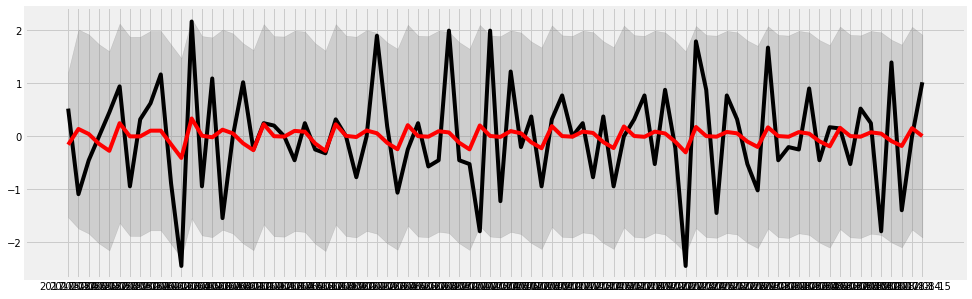

In [24]:
cf= pd.DataFrame(confint)
# prediction_series = pd.Series(prediction,index=arima_y_valid.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(arima_y_valid[zdl_targetColNm], color='black')#, title='validation - '+zdl_targetsNms[0])
    #    legend = zdl_targetsNms[0])
ax.plot(prediction, color = 'red', rot=90)#, legend = 'prediction')
ax.fill_between(prediction.index,
                cf[0],
                cf[1],color='grey',alpha=.3)
plt.show();

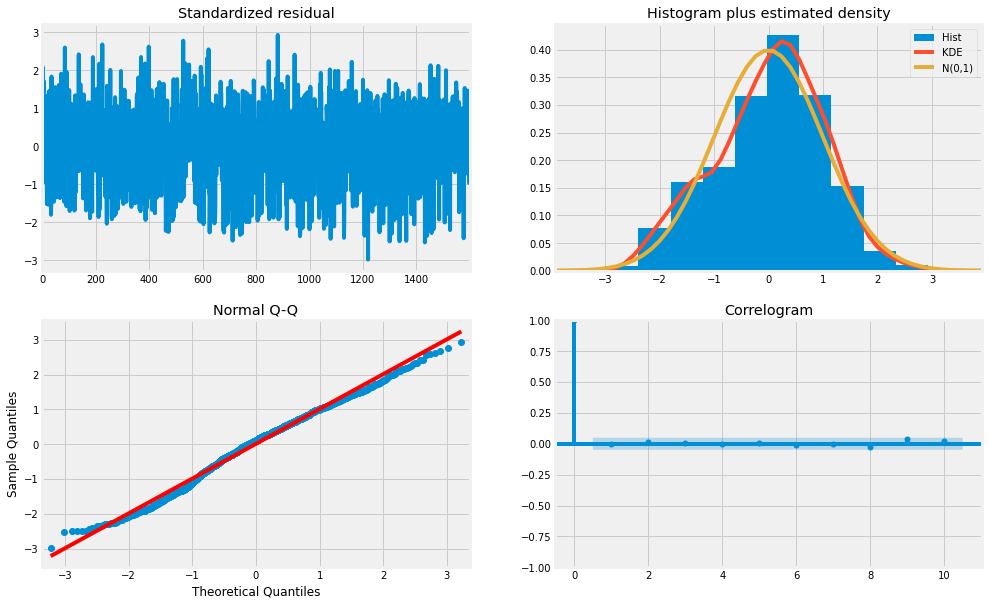

In [25]:
autoArima.plot_diagnostics(figsize=(15,10))
plt.show();

### VARMAX model

In [26]:
# zdl_y_train['zdl_SEAFOOD_52_sales'].plot()
pd.DataFrame(zdl_scaler.scale_).describe()

,0
count,1782.000000
mean,0.648609
std,0.312272
min,0.043670
25%,0.519414
50%,0.604823
75%,0.716691
max,2.780033


In [70]:
# zdl_y_train.corr()
# zdl_y_train.shape[1]
#len(families)*len(stores)

MemoryError: Unable to allocate 6.06 GiB for an array with shape (28512, 28512) and data type float64

In [28]:
zdl_y_train.head()

,zdl_AUTOMOTIVE_1_sales(t+1),zdl_AUTOMOTIVE_2_sales(t+1),zdl_AUTOMOTIVE_3_sales(t+1),zdl_AUTOMOTIVE_4_sales(t+1),zdl_AUTOMOTIVE_5_sales(t+1),zdl_AUTOMOTIVE_6_sales(t+1),zdl_AUTOMOTIVE_7_sales(t+1),zdl_AUTOMOTIVE_8_sales(t+1),zdl_AUTOMOTIVE_9_sales(t+1),zdl_AUTOMOTIVE_10_sales(t+1),...,zdl_SEAFOOD_45_sales(t+16),zdl_SEAFOOD_46_sales(t+16),zdl_SEAFOOD_47_sales(t+16),zdl_SEAFOOD_48_sales(t+16),zdl_SEAFOOD_49_sales(t+16),zdl_SEAFOOD_50_sales(t+16),zdl_SEAFOOD_51_sales(t+16),zdl_SEAFOOD_52_sales(t+16),zdl_SEAFOOD_53_sales(t+16),zdl_SEAFOOD_54_sales(t+16)
2013-01-01,1.222822,2.757599,3.372896,3.037553,2.702279,1.715303,2.441822,2.472943,2.302831,1.607483,...,-0.618021,-0.928758,-0.668761,-0.606990,-1.139807,-0.322762,-0.581763,-0.006697,-0.001473,0.475147
2013-01-02,0.318884,-0.511786,-0.452641,-1.400600,-0.471372,-0.359037,-0.904812,-1.652975,1.726142,-0.336077,...,1.350153,1.059203,0.732231,-0.067454,0.348965,1.382778,0.566531,-0.006697,-0.001473,-1.294602
2013-01-03,-0.001793,-0.511786,-0.980336,0.818477,0.464356,0.630449,-0.002635,2.225751,-4.039440,-0.002065,...,0.207280,0.441991,0.363534,1.167491,0.636402,-0.230098,0.011980,-0.006697,-0.001473,0.813644
2013-01-04,0.450176,0.506869,1.655794,0.261274,-0.471372,-0.002550,-0.002635,-0.201484,4.285664,-1.277602,...,0.236284,-0.100127,0.816996,0.531502,0.244515,0.077578,0.159654,-0.006697,-0.001473,1.629224
2013-01-05,-0.774438,0.191179,0.100219,-0.825016,1.092841,0.223377,-0.002635,-0.540691,0.168390,-0.002065,...,-1.336308,-0.447409,-1.074190,-1.650444,-0.846958,0.116438,-0.647336,-0.006697,-0.001473,-2.448680


In [29]:
# https://analyticsindiamag.com/a-guide-to-varma-with-auto-arima-in-time-series-modelling/
from statsmodels.tsa.statespace.varmax import VARMAX
# someTargets
varmax = VARMAX(endog=zdl_y_train, 
                #exog=x_train, 
                order=(1, 1))
varmax.fit(maxiter=10, disp=False)
print(varmax.summary())

C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\praf6\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 12.1 GiB for an array with shape (28512, 57024, 1) and data type float64

### Manual-based Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
mTree = getModel(modelObj=DecisionTreeRegressor(random_state=0, min_samples_leaf = .01),
                  x_train=zdl_x_train, y_train=zdl_y_train, 
                  x_valid=zdl_x_valid, y_valid=zdl_y_valid,
                  verbose=2)
# PLOTING THE TREE
# fig = plt.figure(figsize=(25, 20))
# _ = tree.plot_tree(tree_reg, max_depth=1, feature_names=x_train.columns,
#                    class_names=targetsNms, filled=True)
saveModel(model=mTree, label = 'mTree')
printPerformanceMeasures(model=mTree, label = 'mTree')


In [ ]:
saveKaggleSubmissionFile(model=mTree, label = 'mTree')


********** date **********
length =  16
['2017-08-16', '2017-08-17']  ...  ['2017-08-30', '2017-08-31']
 |test ok.. >>> DecisionTreeRegressor_mTree_submission.csv saved!


### Manual-Based Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# X, y = make_regression(n_features=4, n_informative=2, n_targets=2,
#                         random_state=0, shuffle=False)
# trash = RandomForestRegressor(max_depth=2, random_state=0)
# trash.fit(X, y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelObj = RandomForestRegressor(random_state=0, min_samples_split=32)
mForest = getModel(modelObj=modelObj,
                  x_train=zdl_x_train, y_train=zdl_y_train, 
                  x_valid=zdl_x_valid, y_valid=zdl_y_valid, verbose=1
)
saveModel(model=mForest, label='mForest')


In [ ]:
printPerformanceMeasures(model=mForest, label = 'mForest')
saveKaggleSubmissionFile(model=mForest, label = 'mForest')

### Manual-based XGBoost

In [ ]:
# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# !pip install lightgbm
# import lightgbm as lgb
import xgboost as xgb
mXgb = getModel(modelObj=xgb.XGBRegressor(random_state=0, objective='reg:squaredlogerror'),
                #   n_estimators=10, max_depth=5, colsample_bytree=.2),
                x_train=zdl_x_train, y_train=zdl_y_train,
                x_valid=zdl_x_valid, y_valid=zdl_y_valid,
                verbose=1)
saveModel(model=mXgb, label='mXgb')
printPerformanceMeasures(mXgb, label='mXgb')
saveKaggleSubmissionFile(model=mXgb, label='mXgb')

nFeatures = 20
fi = pd.DataFrame(data=mXgb.feature_importances_[:nFeatures],
                  index=fullPipeline.get_feature_names_out()[:nFeatures],
                  columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()


### Manual-based SVR

In [ ]:
from sklearn.svm import SVR
mSvr = getModel(modelObj=SVR(C=.5, epsilon=0.2, kernel='poly'),
                #   n_estimators=10, max_depth=5, colsample_bytree=.2),
                x_train=zdl_x_train, y_train=zdl_y_train,
                x_valid=zdl_x_valid, y_valid=zdl_y_valid,
                verbose=1)
saveModel(model=mSvr, label='mSvr')
printPerformanceMeasures(mSvr, label='mSvr')
saveKaggleSubmissionFile(model=mSvr, label='mSvr')


### Manual-based Keras-TensorFlow ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
# Model Architecture Compilation


def getCompiledTfAnnModel(nHiddenLayers=0, nNeurons=0, learningRate=3e-3, dropoutRate=.2):
    # Model architecture
    tfAnn_reg = keras.models.Sequential(name="MLP_TF_ANN")
    tfAnn_reg.add(keras.layers.InputLayer(name="input_layer",
                  input_shape=(len(zdl_x_train[0]),)))  # input layer
    tfAnn_reg.add(keras.layers.Dropout(dropoutRate))  # dropout
    # tfAnn_reg.add(keras.layers.Dense(name = "input_and_1st_hidden_layer", units = nNeurons, input_shape =(x_train.shape[1],), activation='relu'))#input layer shape and first hidden layer
    for i in range(1, nHiddenLayers+1):
        tfAnn_reg.add(keras.layers.Dense(name=("hidden_layer_" + str(i)),
                      units=nNeurons, activation='relu'))  # hidden layer # i
        tfAnn_reg.add(keras.layers.Dropout(dropoutRate))
    tfAnn_reg.add(keras.layers.Dense(name="output_layer",
                  units=1, activation='linear'))  # output layer
    optimizer = keras.optimizers.SGD(learning_rate=learningRate)
    tfAnn_reg.compile(loss='mse', optimizer=optimizer, metrics='mae')
    return (tfAnn_reg)


mTfAnn = getModel(modelObj=getCompiledTfAnnModel(nHiddenLayers=1, nNeurons=10,
                                                 learningRate=1e-3, dropoutRate=.0),
                  x_train=zdl_x_train, y_train=zdl_y_train,
                  x_valid=zdl_x_valid, y_valid=zdl_y_valid,
                  verbose=1)
saveModel(model=mTfAnn, label='mTfAnn')
printPerformanceMeasures(model=mTfAnn, label='mTfAnn')
saveKaggleSubmissionFile(model=mTfAnn, label='mTfAnn')


## Hyperparameters Bayesian Optimization

In [ ]:
# probabilistic optimization via BayesSearchCV
# https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
# !pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.plots import plot_objective
from skopt.space import Real, Categorical, Integer
import tensorflow as tf
from tensorflow import keras


def getOptimalModelViaBayesSearchCv(modelObj, parsDists, x_train, y_train, x_valid, y_valid,
                                    verbose=False, epochs=150, batch_size=32, 
                                    validation_split=.2, n_jobs=4, buildForce=False):
    model = None if buildForce else getSavedModel(modelObj)
    if model is None:
        # log-uniform: understand as search over p = exp(x) by varying x
        opt = BayesSearchCV(modelObj, parsDists, n_iter=32,  cv=3, return_train_score=True,
                            scoring='neg_mean_squared_log_error', verbose=verbose, n_jobs=n_jobs)
        formalism = type(modelObj).__name__
        if formalism == 'XGBRegressor' or formalism == 'LGBRegressor':
            eval_set = [(x_valid, y_valid)]
            opt.fit(x_train, y_train, eval_set=eval_set, verbose=verbose, early_stopping_rounds = 2)
        elif formalism == 'KerasRegressor':
            early_stopping_cb = keras.callbacks.EarlyStopping(
                monitor='val_loss', patience=10, restore_best_weights=True)
            opt.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=validation_split, callbacks=[early_stopping_cb])
        else:
            try:
                opt.fit(x_train, y_train)
            except Exception:
                try:
                    opt.fit(x_train, y_train.values.ravel())
                except Exception:
                    print('>>>>>> Trouble in ', formalism, ' <<<<<<< \n', Exception)
                    return None
                    # pass
        parNames = [name for name, value in parsDists.items()]
        _ = plot_objective(opt.optimizer_results_[0],
                           dimensions=parNames,
                           n_minimum_search=int(1e8))
        plt.show()
        print('best_params= ', opt.best_params_)
        print('best_score (RMSLE) = ', np.sqrt(-opt.best_score_))
        model = opt.best_estimator_
        saveModel(model)
        saveKaggleSubmissionFile(models=[model])
    return (model)


### Near optimal Decision Tree via BayesSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

parsDists = {'splitter': ["best", "random"],  # categorical parameter
             # integer valued parameter
             'max_depth': (1, zdl_x_train.shape[1]),
             'min_samples_split': (np.max([2, round(.001*zdl_x_train.shape[0])]),
                                   np.min([20, round(.01*zdl_x_train.shape[0])])),
             'min_samples_leaf':  (np.max([2, round(.001*zdl_x_train.shape[0])]),
                                   np.min([20, round(.01*zdl_x_train.shape[0])])),
             'max_features': (1, zdl_x_train.shape[1]),
             # log-uniform: understand as search over p = exp(x) by varying x
             'ccp_alpha': (1e-10, 1, 'log-uniform')
             }
oTree = getOptimalModelViaBayesSearchCv(modelObj=DecisionTreeRegressor(random_state=0),
                                        parsDists=parsDists,
                                        x_train=zdl_x_train, y_train=zdl_y_train,
                                        x_valid=zdl_x_valid, y_valid=zdl_y_valid,
                                        verbose=2, n_jobs = 4, buildForce = True)
printPerformanceMeasures(oTree)
PLOTING THE TREE
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(oTree, max_depth=1, feature_names=x_train.columns,
                   class_names=zdl_targetsNms, filled=True)


### Near optimal Light GBoost via BayesSearchCV

In [ ]:
#https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# !pip install lightgbm
# import lightgbm as lgb
# oLgb = getOptimalModelViaBayesSearchCv(modelObj=lgb.LGBMRegressor(random_state=0, 
#                                         objective='reg:squaredlogerror'),
#                                         parsDists={
#     'n_estimators': Integer(1, 100, 'uniform'),
#     'max_depth': Integer(1, zdl_x_train.shape[1], 'uniform'),
#     'num_leaves': Integer(1, zdl_x_train.shape[1], 'uniform'),
#     'learning_rate': Real(.1e-6, 1, 'log-uniform')},
#     x_train=zdl_x_train, y_train=zdl_y_train, x_valid=zdl_x_valid, y_valid=zdl_y_valid, verbose=0)
# printPerformanceMeasures(oLgb)

#### Feature Importance

In [ ]:
# nFeatures = 20
# fi = pd.DataFrame(data=oLgb.feature_importances_[:nFeatures],
#              index=oLgb.feature_names_in_[:nFeatures],
#              columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

### Near optimal XGBoost via BayesSearchCV

In [ ]:
# import xgboost as xgb
# oXgb = getOptimalModelViaBayesSearchCv(modelObj=xgb.XGBRegressor(seed=0, 
#                                         objective='reg:squaredlogerror'),
#                                         parsDists={
#     'n_estimators': Integer(2, 10, 'uniform'),
#     'max_depth': Integer(1, zdl_x_train.shape[1], 'uniform'),
#     'eta': Real(.001, .1, 'uniform'),
#     'colsample_bytree': Real(.1, 1, 'uniform'),
#     'learning_rate': Real(.1e-6, 1, 'log-uniform')},
#     x_train=zdl_x_train, y_train=zdl_y_train, x_valid=zdl_x_valid, y_valid=zdl_y_valid, verbose=0)
# printPerformanceMeasures([oXgb])

#### Feature Importance

In [ ]:
# nFeatures = 20
# fi = pd.DataFrame(data=oXgb.feature_importances_[:nFeatures],
#              index=oXgb.feature_names_in_[:nFeatures],
#              columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

#### Forecast validation series

In [ ]:
# predictionColsNms = [(trialTargetsNms + '_prediction') for targetNm in trialTargetsNms]
# # print(predictionColsNms)
# ts_validation[predictionColsNms] = oXgb.predict(x_valid)#.round(decimals=0)
# ts_validation[trialTargetsNms + predictionColsNms].head()

In [ ]:
# ts_train_validation= pd.merge(left=ts_train_validation, right=ts_validation[predictionColsNms], how='left', left_index=True, right_index=True)
# ts_train_validation[predictionColsNms+trialTargetsNms].head(-3)

In [ ]:
# ax = ts_train_validation[trialTargetsNms[0]].plot(figsize=(15, 5), linewidth = .5)
# ts_train_validation[predictionColsNms[0]].plot(ax=ax, style='-.', linewidth = .5)
# # ax.axvline(splitDate, color='black', ls='--')
# plt.legend(trialTargetsNms + predictionColsNms)
# ax.set_title('Raw Dat and Prediction')
# plt.show()